<a href="https://colab.research.google.com/github/HIT-YL/py-03/blob/master/wk09_py_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 12-01
## numpy, pandas, matplotlib

- numpy는 데이터를 다루기 위한 수학 구조를 지원하는 모듈이다. 숫자, 배타, 행렬을 다 담고 있다.
- pandas는 데이터를 다루는 클래스와 모듈들이 모여있는 모듈이다. R에서 사용하는 데이터 구조를 지원한다. (데이터프레임 지원)
- matplotlib는 강력한 그래픽 라이브러리 모듈이다.

### NumPy를 사용한다

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving reactions.txt to reactions.txt
User uploaded file "reactions.txt" with length 25000 bytes


In [7]:
ls

bookmark.py  __pycache__/  reactions.txt  sample_data/  testmodule.py


In [0]:
# 파일로부터 데이터를 읽어 들임
# 반응 테스트의 실험 데이터를 읽어 들임
import numpy as np       # numpy을 임포트
# 파일에서 데이터를 읽어 들임 (colab에서 읽어보시오.)
reactions_in_ms = np.loadtxt('reactions.txt')

In [9]:
# NumPy의 array를 사용한다.
# 데이터 요약 보기
print(reactions_in_ms.size)       # 요소 수를 표시
print(reactions_in_ms[:20])       # 앞에서부터 20개 요소를 표시

1000
[664. 481. 511. 612. 526. 498. 441. 447. 685. 477. 525. 686. 685. 485.
 525. 704. 631. 464. 576. 514.]


In [11]:
# array( ) 나눗셈
# 밀리초(ms)를 초(s)로 고침
reactions_in_sec = reactions_in_ms/1000 # 초단위로 바뀜
print(reactions_in_sec[:20])            # 앞에서부터 20개 요소를 표시

[0.664 0.481 0.511 0.612 0.526 0.498 0.441 0.447 0.685 0.477 0.525 0.686
 0.685 0.485 0.525 0.704 0.631 0.464 0.576 0.514]


In [14]:
# NumPy의 여러 가지 함수
# 기본 통계를 표시하고 데이터의 요약을 검토
print("평균값 :", np.mean(reactions_in_sec))
print("중앙값 :", np.median(reactions_in_sec)) # 중앙에 있는 값
print("표준편차 :", np.std(reactions_in_sec))
print("최솟값 :", np.min(reactions_in_sec))
print("최대값 :", np.max(reactions_in_sec))

평균값 : 0.492834
중앙값 : 0.478
표준편차 : 0.10190053210852237
최솟값 : 0.251
최대값 : 0.843


## pandas

- 파이썬에서 데이터를 처리하는 모듈 (R과 유사함)

In [20]:
# pandas의 DataFrame형을 사용한다
import pandas as pd
reactions_df = pd.DataFrame(reactions_in_sec, columns=['react_sec']) # colums라는 매개변수 키 값을 하나 주고, react_sec라는 colums 이름을 지정해준다. ()
reactions_df.head()       # 데이터의 개요를 표시
# head는 현재 데이터 중 앞에서 5~6개를 출력

,react_sec
0,0.664
1,0.481
2,0.511
3,0.612
4,0.526


In [24]:
reactions_df.columns

Index(['react_sec'], dtype='object')

In [25]:
reactions_df.describe()   # 데이터의 평균, 표준 편차, 최댓값, 최솟값 등을 표시

,react_sec
count,1000.000000
mean,0.492834
std,0.101952
min,0.251000
25%,0.417000
50%,0.478000
75%,0.559000
max,0.843000


In [26]:
reactions_df.columns

Index(['react_sec'], dtype='object')

### matplotlib를 사용한다

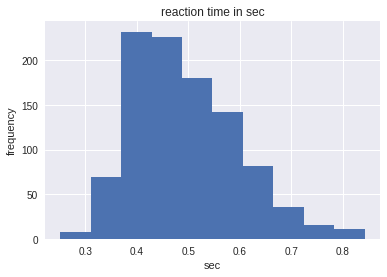

In [28]:
# matplotlib으로 히스토그램을 그린다
%matplotlib inline
import matplotlib.pyplot as plt # matplotlib를 임포트
h = plt.hist(reactions_in_sec)  # 히스토그램을 그림

# Add title and axis names
plt.title('reaction time in sec')
plt.xlabel('sec')
plt.ylabel('frequency')
plt.show()
# Ctrl + / 는 주석 해제

***

# Chapter 12-02
## NumPy를 사용한다

### NumPy의 array를 생성한다

- numpy에서 제일 중요한 구조가 array(배열)이다.
- 리스트는 수학적으로 엄격하지 않지만, array는 수학적으로 엄격하다.

In [34]:
# array의 작성
import numpy as np         # NumPy를 임포트
a = np.array([0, 1, 2, 3]) # array를 만듦
a                          # array를 표시

array([0, 1, 2, 3])

In [35]:
# 2차원 array의 작성
# b는 2차원 배열
b = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]]) # 콤마로 구분
b

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

=> a는 1차원 배열이고, b는 2차원 배열이다.

In [37]:
# array의 속성
print(b.ndim)       # 차원 수
                    # (ex) 1차원 배열이면 1이 출력, 2차원 배열이면 2가 출력
print(b.shape)      # 각 차원의 요소 수
                    # 행과 열의 개수
print(b.size)       # 크기
print(b.dtype)      # 형

2
(3, 3)
9
int64


In [38]:
a.ndim, a.shape, a.size # 콤마로 구분해서 여러가지 변수를 확인

(1, (4,), 4)

a.shape는 (4,) 를 주의할 것. 4, 는 4  by 1이라는 뜻이다. 그렇다며 기본적으로 numpy는 행베타를 가로로 배치해서 그냥 배타로 처리한다.

In [40]:
# 2차원 배열로 변환한다
# reshape()로 array로 변경
b2 = np.zeros(9).reshape(3, 3) # reshape은 numpy 안에 있는 외부 함수
# 9개의 0를 만들어서 이것을 3 by 3로 출력한다.
b2

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

reshape 함수는 데이터구조를 내 마음대로 변형시킬 수 있기 때문에 자주 사용된다.

In [42]:
# 배열의 회전
# T(전치 행렬)를 표시
# 0,1,2,3,4 5,6,7,8는 3x3의 array
a = np.arange(9).reshape(3, 3)  # arange() means 'array' range() => arange는 range 함수를 만들어주되, 배열로 바꿔서 처리해줌
a     # array 보기

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [43]:
a==b

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [44]:
a.T    # 90도 회전한 array 보기 : transpose of a matrix

array([[0, 3, 6],
       [1, 4, 7],
       [2, 5, 8]])

대각선상 위에 있는 성분들은 바뀌지 않는다. 그러므로 아래 식에서 대각성분은 True.

In [45]:
a.T == b
# 대각성분(diagonal elements)만 일치

array([[ True, False, False],
       [False,  True, False],
       [False, False,  True]])

### array를 사용한 연산

In [48]:
# 각 요소에 1을 더함
a = np.arange(1, 10)    # 1에서 9까지의 배열을 만듦
a+1                     # 각 요소에 1을 더하여 표시
# 숫자 하나는 0차원
# a는 1차원이고 1은 0차원인데, 왜 모든 값은 0차원에 들어가는가?
# 브로드캐스트

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])

In [49]:
# 배열의 덧셈
# 2개의 array의 각 요소를 더함
a = np.arange(1, 10)
b = np.arange(1, 10)    # 1에서 9까지의 배열을 2개 만듦
a+b                     # a의 요소와 b의 요소를 더함

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18])

In [0]:
# 배열의 곱셈 1
# 브로드캐스팅(Broadcasting)
a = np.ones(9).reshape(3, 3) # 1로만 구성된 3×3의 array를 만듦

# ones는 인덱스 개수만큼 1을 만드는 함수다.

b = np.arange(1, 4)          # 1, 2, 3의 array를 만듦

In [52]:
a,b

(array([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]), array([1, 2, 3]))

In [53]:
# 곱셈한 결과를 표시
a*b 

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [54]:
a*(b.T),b.T

(array([[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]]), array([1, 2, 3]))

**1차원 배열의 프랜스포즈(전치행렬)은 자기자신**이다.

In [55]:
# 배열의 곱셈 2
# 브로드캐스팅을 사용하여 3x3의 array를 만든다
np.zeros((3, 1))*np.zeros((1, 3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

행베타와 열베타를 곱하면 2차원 배열로 확장이 된다.

In [56]:
# 요소의 합계
# 함수를 사용한 연산
# 0부터 8까지로, 3×3의 array를 만듦
a = np.arange(9).reshape(3, 3)
print(a)
np.sum(a)        # 합계를 계산

[[0 1 2]
 [3 4 5]
 [6 7 8]]


36

In [59]:
# 축끼리의 덧셈을 한다.
# 인수 axis를 준 연산
# [[0 1 2]
#  [3 4 5]
#  [6 7 8]]
# 위 배열의 각 축의 합계를 계산
np.sum(a, axis=0)  # 세로합

# 잘 알아둬야 하는 내용임 !!!

array([ 9, 12, 15])

In [60]:
np.sum(a, axis=1)  # 가로합

array([ 3, 12, 21])

### 요소에의 접근 (중요)

In [61]:
# 요소에 접근한다
a = np.arange(9).reshape(3, 3) # 0부터 8까지로 3×3의 array를 만듦
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [62]:
a[1, 2]                        # 1, 2의 요소를 표시 (세로->가로)

5

In [63]:
# 슬라이스 이용
# 슬라이스를 사용하여 요소를 추출하기
a[1:, 1:3]             # 오른쪽 아래의 2×2의 배열을 꺼냄

array([[4, 5],
       [7, 8]])

In [65]:
# 인덱스에 리스트를 지정한다
# 인덱스에 리스트를 전달하여 여러 요소를 추출하기
d = np.arange(1, 10)        # 1에서 9까지의 array를 만듦
d[[1, 3, 5, 7]]             # 짝수만 꺼냄
                            # 대괄호 리스트로 홀수만 묶어둠

array([2, 4, 6, 8])

### array 연결 (중요)

In [67]:
# 횡 방향으로 연결한다
a = np.arange(4).reshape(2, 2)      # 2×2, 0에서 3까지의 array
b = np.arange(5, 9).reshape(2, 2)   # 2×2, 5에서 8까지의 array
np.hstack((a, b))   # 2차원 배열을 튜플로 넣어줌

# 2개의 배열을 가로로 합성한다.

array([[0, 1, 5, 6],
       [2, 3, 7, 8]])

In [68]:
# 종 방향으로 연결한다
a = np.arange(4).reshape(2, 2)      # 2×2, 0에서 3까지의 array
b = np.arange(5, 9).reshape(2, 2)   # 2×2, 5에서 8까지의 array
np.vstack((a, b))

# 2개의 배열을 세로로 합성한다.

array([[0, 1],
       [2, 3],
       [5, 6],
       [7, 8]])

### np.c_[]  & np._r[]  (column & row)

In [70]:
a, b

(array([[0, 1],
        [2, 3]]), array([[5, 6],
        [7, 8]]))

In [71]:
np.c_[a, b]    # 반드시 대괄호

array([[0, 1, 5, 6],
       [2, 3, 7, 8]])

In [72]:
np.r_[a, b]   # row by row

array([[0, 1],
       [2, 3],
       [5, 6],
       [7, 8]])

### array의 복사(copy)

In [76]:
# array끼리의 대입
# 내장 리스트형과 마찬가지로 array의 대입 복사된다
# (변수가 동일한 array에 대한 참조 포함)
a = np.zeros(4)     # 4개의 0으로 array를 만듦
b = a               # b에 대입
b += 1              # 각 요소에 1을 더함
a                   # a의 내용을 표시 (동일한 주소로 참조)

array([1., 1., 1., 1.])

In [77]:
# 존재하는 array에서 다른 array를 생성하고 싶을 때는 명시적으로 복사한다
a = np.zeros(4)     # 4개의 0으로 array를 만듦
b = a.copy()        # b에 대입
b += 1              # 각 요소에 1을 더함
a,b                 # a,b의 내용을 표시

# 같은 내용을 가진 서로 다른 구조를 만들고 싶을 때.

(array([0., 0., 0., 0.]), array([1., 1., 1., 1.]))

***

## [wk10] homework

> 다음 Youtube 강의 2편를 들으면서 파이썬 노트북을 하나 만들어서 각자의 github에 올리시오.(마감: 2018.11.4(일). 24:00)

#### 제출 파일명: Summary_numpy.ipynb


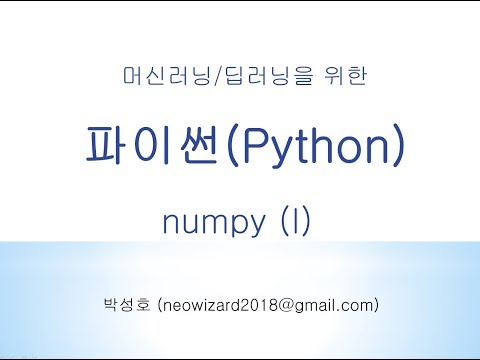

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('ku9-AxaznSA')  # numpy 기초 I

In [0]:
YouTubeVideo('dnJ3JESmBkE')  # numpy 기초 II

In [0]:
A= np.array([1,2,3])
B= np.array([4,5,6])

In [0]:
A-B,A*B,A/B,A%B,A//B,B//A

In [0]:
C= np.array([1,2,3])
D=C.reshape(1,3)

In [0]:
C,D

In [0]:
C.shape,D.shape

***